# Introduction to sklearn

This notebook demonstrates the most useful functions of the sklearn library.

0. An end to end sklearn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the estimator and use it to make predictions
4. Evaluate the model
5. Improve a model
6. Save and load a trained model
7. Putting it all together



## 0. An end to end sklearn workflow

In [2]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#1 get the data ready.
import pandas as pd
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [47]:
# df.pop() is a nice funtion that will return the selected column and drop it from the dframe.
xtest = pd.read_csv('heart-disease.csv')
ytest = xtest.pop('target')
print(xtest.head())
#print(ytest.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [8]:
# create X (features matrix or data matrix)
X = heart_disease.drop('target', axis=1)

# Create Y (labels)
Y = heart_disease['target']

In [11]:
#2 Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()  # clf is short for classifier in sklearn according to documentation, sometimes called model

# we will keep the default hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [15]:
# 3 fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [27]:
clf.fit(x_train, y_train); # this is basically saying, RandomForest, find the patterns in the training data!

In [28]:
# 3 cont. make a prediction
y_preds = clf.predict(np.array[0,1,2,3]) # will not work as array has to be the same shape.
# our model can only make prediction on what is has learned, ie., the shape of the array has to be the same. Ie, the test data!

TypeError: 'builtin_function_or_method' object is not subscriptable

In [29]:
y_preds = clf.predict(x_test) # y_preds in the convention for making predictions on test data.

In [23]:
y_preds.shape

(61,)

In [30]:
# 4 Evaluate the model on the training data and the test data
## accuracy.
clf.score(x_train, y_train) # a score of 1 is very well, and is no surprise because the machine has been able to correct itself as it saw the answers when it trained itself, no surprise on the score!.

1.0

In [33]:
clf.score(x_test, y_test) # the result is lower, as the model has never seen this data.

0.8524590163934426

In [35]:
# other metrics we can use to evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [36]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84        27
           1       0.90      0.82      0.86        34

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



In [37]:
confusion_matrix(y_test, y_preds)

array([[24,  3],
       [ 6, 28]], dtype=int64)

In [38]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [39]:
# 5  improve a model 
## try different hyperparameters
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) *100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 81.97%

Trying model with 20 estimators...
Model accuracy on test set: 85.25%

Trying model with 30 estimators...
Model accuracy on test set: 86.89%

Trying model with 40 estimators...
Model accuracy on test set: 86.89%

Trying model with 50 estimators...
Model accuracy on test set: 81.97%

Trying model with 60 estimators...
Model accuracy on test set: 81.97%

Trying model with 70 estimators...
Model accuracy on test set: 86.89%

Trying model with 80 estimators...
Model accuracy on test set: 86.89%

Trying model with 90 estimators...
Model accuracy on test set: 86.89%



In [40]:
# 6 save a module and load it
import pickle

pickle.dump(clf, open("random_forest_model_1.pk1", "wb"))

In [42]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb"))
loaded_model.score(x_test, y_test) # the answer here matches with 90 estimators, the past point where clf where the model (or classifier) was instatiated.

0.8688524590163934

# Note on Warnings

In [50]:
# if you know all warnings in your notebook can be ignored.
#import warnings
#warnings.filterwarnings('ignore')


System:
    python: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
executable: C:\Users\Shane Rich\Desktop\data_ml\env\python.exe
   machine: Windows-7-6.1.7601-SP1

Python dependencies:
          pip: 20.2.4
   setuptools: 50.3.0.post20201103
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: None
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True


## 1. Getting data ready to be used with machine learning.
Three main things to do:
1. split the data into features and labels (usually x and y)
2. filling (also called imputing) missing data, or disregarding missing values
3. converting non numerical values to numerical values (also called feature encoding)

In [55]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
x = heart_disease.drop('target', axis=1)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [5]:
y = heart_disease['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [6]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [60]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 make sure its all numerical

In [7]:
car_sales = pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [63]:
car_sales.shape

(1000, 5)

In [64]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [8]:
# split into x and y
x = car_sales.drop('Price', axis=1)
y = car_sales['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

In [69]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [10]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  catagorical_features)],
                               remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

ColumnTransformer(remainder='passthrough',
                  transformers=[('one_hot', OneHotEncoder(),
                                 ['Make', 'Colour', 'Doors'])])


In [74]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [76]:
x.head(), x.shape

(     Make Colour  Odometer (KM)  Doors
 0   Honda  White          35431      4
 1     BMW   Blue         192714      5
 2   Honda  White          84714      4
 3  Toyota  White         154365      4
 4  Nissan   Blue         181577      3,
 (1000, 4))

In [79]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [80]:
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)
model.fit(x_train, y_train)

RandomForestRegressor()

In [81]:
model.score(x_test, y_test)

0.3235867221569877

### 1.3 Missing Values
1. Fill with some value (also known as imputation).
2. Remove samples with missing data altogether.


In [88]:
# import car_sales missing data
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [89]:
car_sales_missing.isna().sum()  

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [90]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [91]:
# lets try to convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  catagorical_features)],
                               remainder='passthrough')

transformed_x = transformer.fit_transform(x)
transformed_x

ValueError: Input contains NaN

#### Option 1: Fill missing data with pandas


In [94]:
# fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)
car_sales_missing['Colour'].fillna('missing', inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)
car_sales_missing['Doors'].fillna(4, inplace=True)



In [95]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [96]:
# remove rows with missing price value, and as these are only in the price column, those 50 rows will be removed from the data.
car_sales_missing.dropna(inplace=True)

In [98]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [99]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [100]:
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [102]:
# lets try to convert our data to numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

catagorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', 
                                  one_hot, 
                                  catagorical_features)],
                               remainder='passthrough')

transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Extension -  Feature Scaling
use normalisation (MinMaxScaler) and standardisation (StandardScalar)  to scale data. 

### Option 2: Fill missing values with sklearn

In [15]:
car_sales_missing = pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [16]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [17]:
# drop the rows where NaN in Price column.
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [18]:
#split into x and y
x = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [19]:
# split data first, then fill and transform training and test seperately (that was an error in the video)
np.random.seed(42)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [111]:
#check for NaN
x.isna().sum()
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0


Let's fill the missing values. We'll fill the training and test values separately to ensure training data stays with the training data and test data stays with the test data.

Note: We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).


In [20]:
# fill in missing values from sklearn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill catagorial values with 'missing' and numerical with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# Define Columns
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features), ("door_imputer", door_imputer, door_features), ("num_imputer", num_imputer, num_features)])

# Fill the train and test values seperately
filled_x_train = imputer.fit_transform(x_train)
filled_x_test = imputer.transform(x_test)

#check filled x_train
filled_x_train


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [21]:
# Get arrays back to dataframes
car_sales_filled_train = pd.DataFrame(filled_x_train, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test = pd.DataFrame(filled_x_test, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled_test

,Make,Colour,Doors,Odometer (KM)
0,Toyota,Blue,4,99761
1,Toyota,Black,4,17975
2,Honda,Blue,4,197664
3,Nissan,Green,4,235589
4,Honda,Black,4,231659
...,...,...,...,...
185,Honda,Green,4,165101
186,Nissan,Green,3,153554
187,Toyota,White,4,108569
188,BMW,Black,3,201190


In [117]:
# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [118]:
car_sales_filled_test.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

Okay, no missing values but we've still got to turn our data into numbers. Let's do that using one hot encoding.

Again, keeping our training and test data separate.


In [22]:
# Import OneHotEncoder class from sklearn
from sklearn.preprocessing import OneHotEncoder

# Now lets OneHotEncode the features as we did before
categorial_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder() # the transformation could be normalisation or standardisation for certain features
transformer = ColumnTransformer([("one_hot", one_hot, categorial_features)], remainder="passthrough")

# Fill train and test sets seperately
transformed_x_train = transformer.fit_transform(car_sales_filled_train)
transformed_x_test = transformer.transform(car_sales_filled_test)

transformed_x_train.toarray()
                                 

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

Wonderful, now we have filled (also removed rows where NaN was present in the labels) our data, transformed names to numerical.
Time to fit a model!

In [25]:
# Now we have transformed it, let us fit a model.
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# Set_up the model
model = RandomForestRegressor()

# Make sure to use transformed (filled and one hot coded X data)
model.fit(transformed_x_train, y_train)

model.score(transformed_x_train, y_train), model.score(transformed_x_test, y_test)

(0.8815306236443183, 0.21229043336119102)

![ml_map](ml_map.png)

## 2. Choosing the right estimator/algorithm for our problem.
sklearn uses estimator as another term for machine learning model or machine learning algorithm. 

Classification
Regression

### 2.1 Picking a ML model for a regression problem.

In [32]:
# Import Boston housing dataset  
from sklearn.datasets import load_boston

boston = load_boston()
boston;

In [33]:
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names']) # passing a dictionary into a df!
boston_df['target'] = pd.Series(boston['target']) # add dict key target as a column in the dataframe.
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [35]:
# how many samples
len(boston_df), boston_df.isna().sum()

(506,
 CRIM       0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
 target     0
 dtype: int64)

In [37]:
# lets try the Rigfe regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# set up random seed
np.random.seed(42)

#create the data
x = boston_df.drop('target', axis=1)
y = boston_df['target']

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instatiate Ridge model
model = Ridge()
model.fit(x_train, y_train)

#Check the score
model.score(x_train, y_train), model.score(x_test, y_test)



(0.7487825119234439, 0.6662221670168521)

How do we improve this score?

In [46]:
# Let us try the random forest
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x = boston_df.drop('target', axis=1)
y = boston_df['target']

#Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#instatiate RandomForestRegressor model
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

#evaluate the score
rf.score(x_train, y_train), rf.score(x_test, y_test)

(0.9763520974033731, 0.8654448653350507)

In [43]:
 model.score(x_test, y_test), rf.score(x_test, y_test)

(0.6662221670168521, 0.8654448653350507)

### 2.2 Choosing an estimator for a classification problem

In [65]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
len(heart_disease)

303

Estimator map says to try SVC given the data we have.


In [66]:
#import the linear SVC 
from sklearn.svm import LinearSVC

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']
#y = heart_disease.pop('target') # using pop() means that to rerun this cell then rerun the import csv first.

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC
model = LinearSVC(max_iter=10000)

model.fit(x_train, y_train)

model.score(x_train, y_train), model.score(x_test, y_test)


C:\Users\Shane Rich\Desktop\data_ml\env\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(0.743801652892562, 0.8688524590163934)

In [67]:
#import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis=1)
y = heart_disease['target']
#y = heart_disease.pop('target') # using pop() means that to rerun this cell then rerun the import csv first.

# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

model.score(x_train, y_train), model.score(x_test, y_test)

(1.0, 0.8524590163934426)

Tidbit: 1) If there are patterns in structured table data, use ensemble e.g., random forest estimators.
2) If you have unstructured data, use deep learning or transfer learning.

## 3. Fit the model on the data and use it to make predictions
### 3.1 Fitting the model to the data
Different names for:
* `X` = features, feature_variables, data
* `y` = labels, targets, target variables, ground truth

In [74]:
#import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']
#y = heart_disease.pop('target') # using pop() means that to rerun this cell then rerun the import csv first.

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier.
model = RandomForestClassifier()

# Fit the model to the data (train the ML model).
model.fit(X_train, y_train)

#Use the model the machine has learned.
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.8524590163934426)

### 3.2 Making predictions with a ML model
2 main ways to make predictions:
1. predict()
2. predict_proba()

In [75]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [71]:
# use a trained model to make predictions
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [73]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [76]:
# Compare predictions to truth labels to evaluate the model
y_preds = model.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with predict_proba()

In [ ]:
# predict_proba() returns probabilities of a classification label

In [82]:
# the probs add to 1, basically the probability results for each prediction.
# predict_proba allows you to prod the data, ie., question the rows that are unclear or filtering results that have high probability
model.predict_proba(X_test[:5])a

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [84]:
#Lets predict on the same data.
model.predict(X_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

`predict()` can also be used for regression models

In [85]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

#Make predictions 
y_preds = model.predict(X_test)

In [86]:
y_preds[:10]

array([23.081, 30.574, 16.759, 23.46 , 16.893, 21.644, 19.113, 15.334,
       21.14 , 20.639])

In [88]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [90]:
# compare the predictions to the truth (the results above, ie, mean difference between prediction and actual values)
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_preds, y_test)

2.136382352941176

##  4. Evaluating a ML model
3 ways to evaluate sklearn estimators:
1. Estimator `score` method.
2. The `scoring` parameter.
3. Problem-specific metric functions.

### 4.1  Evalutating a model with a score method

In [96]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)


In [97]:
# score method. Every estimator in sklearn has the score method.
#for RFClassifier, score is calculated as "Return the mean accuracy on the given test data and labels."
model.score(X_train, y_train), model.score(X_test, y_test)

(1.0, 0.8524590163934426)

In [98]:
# Lets do the same for the regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

In [99]:
# note that score for regressor is calculated different to the RFClassifier.."Return the coefficient of determination R^2 of the prediction."
# Bascially, every estimator grouping has different default metrics, ie, regressors like use R^2.
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9763520974033731, 0.8654448653350507)

### 4.2 Evaluating a model using the scoring parameter
#### more powerful metrics

In [100]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)

In [101]:
model.score(X_test, y_test)

0.8524590163934426

In [102]:
#cross_val_score returns an array. cross validation with 5 is called 5-fold. K-fold 5.
# makes 5 different splits on the data.
cross_val_score(model, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [104]:
np.random.seed(42)
#single training and test split score
model_single_score = model.score(X_test, y_test)

# take mean of 5-fold cross validation score 
model_cross_val_score = cross_val_score(model, X, y).mean()

# Compare the two
model_single_score, model_cross_val_score


(0.8524590163934426, 0.8248087431693989)

 Even though the cross_validation method result above is slightly lower, we prefer this to the single training score as it will give a more accurate depiction of the data set (a single result can either be very lucky or unlucky).


In [ ]:
# Default scoring parameter of model = mean accuracy , because our model is RFClassifer.
model.score()

In [106]:
# Scoring parameter set to None as default, ie. as below: None actually equals the default scoring parameter of the model. In this case, a RFClassifier.
cross_val_score(model, X, y, scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

![cross_val](cross_val.png)

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy

In [112]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

model = RandomForestClassifier()

cross_val_score(model, X, y), cross_val_score(model, X, y).mean()

(array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333]),
 0.8018032786885245)

In [116]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {cross_val_score(model, X, y).mean()*100:.2f} %")

Heart Disease Classifier Cross-Validated Accuracy: 82.49 %


**Area under the reciever operating characteristics curve (AUC/ROC)**

* Area under curve (AUC)
* ROC

ROC curves are a comparison of a models true positive rate (tpr) versus a models false positive rate (fpr)

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negatives = model predicts 0 when truth is 0
* False negatives = model predicts 0 when truth is 1

In [118]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier().fit(X_train, y_train)

In [121]:
from sklearn.metrics import roc_curve

# make predictions with probs
y_probs = model.predict_proba(X_test)

y_probs[:10]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53]])

In [140]:
y_test.head()

179    0
228    0
111    1
246    0
60     1
Name: target, dtype: int64

In [127]:
y_probs_positive = y_probs[:, 1] # slicing, all rows, column 1.
y_probs_positive[:10]

array([0.11, 0.51, 0.57, 0.16, 0.82, 0.86, 0.64, 0.05, 0.01, 0.53])

In [128]:
# calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.06896552,
       0.06896552, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.27586207, 0.4137931 , 0.48275862, 0.55172414,
       0.65517241, 0.72413793, 0.72413793, 0.82758621, 1.        ])

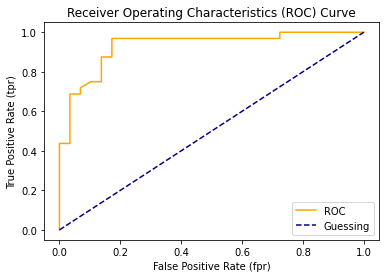

In [133]:
 # Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a roc curve given the false positive rate (fpr) and the true positive rate (tpr) of model.
    '''
    # plot the roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")
    # plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")
    #custimise the plot 
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [135]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9304956896551724

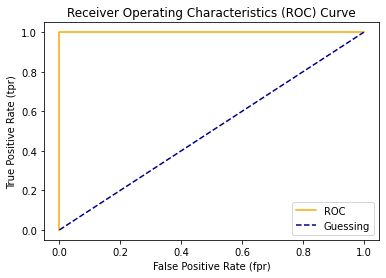

In [137]:
# plot perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [141]:
# perfect AUC score 
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**